## Import Libraries

In [246]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras import Sequential, Model
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.applications.imagenet_utils import decode_predictions
from keras.layers import GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.preprocessing import image
from keras import optimizers
import random as rn
from keras.layers import Dense, Dropout
import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import tensorflow as tf
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from datetime import datetime
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [262]:
# # #Delete files from kaggle/working
# # os.remove("/kaggle/working/InceptionV3_my_best_model.epoch08-loss1.08.hdf5")
# # os.remove("/kaggle/working/my_best_model.epoch01-loss0.59.hdf5")
# import os
# for dirname, _, filenames in os.walk('/kaggle/working'):
#     for filename in filenames:
#         if filename not in ('my_best_model.epoch40-loss0.49.hdf5','my_best_model.epoch41-loss0.49.hdf5','my_best_model.epoch22-loss0.49.hdf5'):
#             print(os.path.join(dirname, filename))
#             os.remove(os.path.join(dirname, filename))


/kaggle/working/InceptionV3_my_best_model.epoch04-loss0.55.hdf5
/kaggle/working/InceptionV3_my_best_model.epoch01-loss0.53.hdf5
/kaggle/working/InceptionV3_my_best_model.epoch01-loss0.62.hdf5


# Generate Dataframe from Input Data 

In [220]:
# data is in "data" folder, contains 9 classes. Please build an image classification model to classify images.
#declare empty df
df = pd.DataFrame(columns=['img_path','class'])
row=[]
for dirname, _, filenames in os.walk('/kaggle/input/car-classification/Sr.DS Assgn/data'):
    for filename in filenames:
        row.append(
            {
                'img_path': str(os.path.join(dirname,filename)),
                'class': str(dirname.split('/')[-1])
            }
        )
df=pd.DataFrame(row)
    
#         print(os.path.join(dirname, filename))

In [221]:
#we can see data is balanced. all classes have same count of samples
df['class'].value_counts()

unknown                       500
rear                          500
3_4th_driver_side_rear        500
passenger_side                500
front                         500
3_4th_passenger_side_front    500
3_4th_passenger_side_rear     500
3_4th_driver_side_front       500
driver_side                   500
Name: class, dtype: int64

In [222]:
#sample df
df.head()

img_path    class
0  /kaggle/input/car-classification/Sr.DS Assgn/d...  unknown
1  /kaggle/input/car-classification/Sr.DS Assgn/d...  unknown
2  /kaggle/input/car-classification/Sr.DS Assgn/d...  unknown
3  /kaggle/input/car-classification/Sr.DS Assgn/d...  unknown
4  /kaggle/input/car-classification/Sr.DS Assgn/d...  unknown

In [223]:
unique_classes= df['class'].unique()
unique_classes

array(['unknown', 'rear', '3_4th_driver_side_rear', 'passenger_side',
       'front', '3_4th_passenger_side_front', '3_4th_passenger_side_rear',
       '3_4th_driver_side_front', 'driver_side'], dtype=object)

## Visulaize the Images

/kaggle/input/car-classification/Sr.DS Assgn/data/unknown/198878.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/unknown/124400.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/unknown/37468.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/unknown/15082.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/unknown/215819.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/unknown/59306.jpg


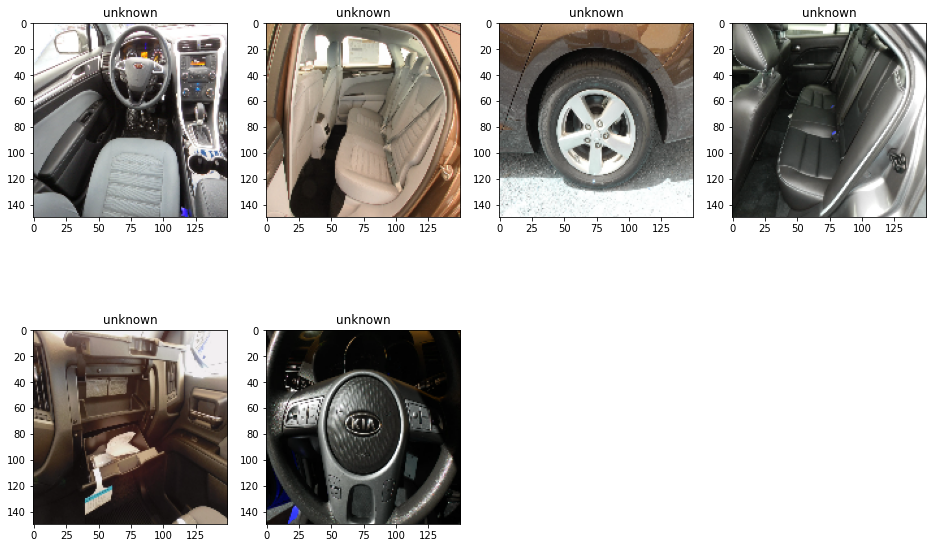

/kaggle/input/car-classification/Sr.DS Assgn/data/rear/77607.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/rear/72947.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/rear/77564.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/rear/90654.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/rear/39839.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/rear/45523.jpg


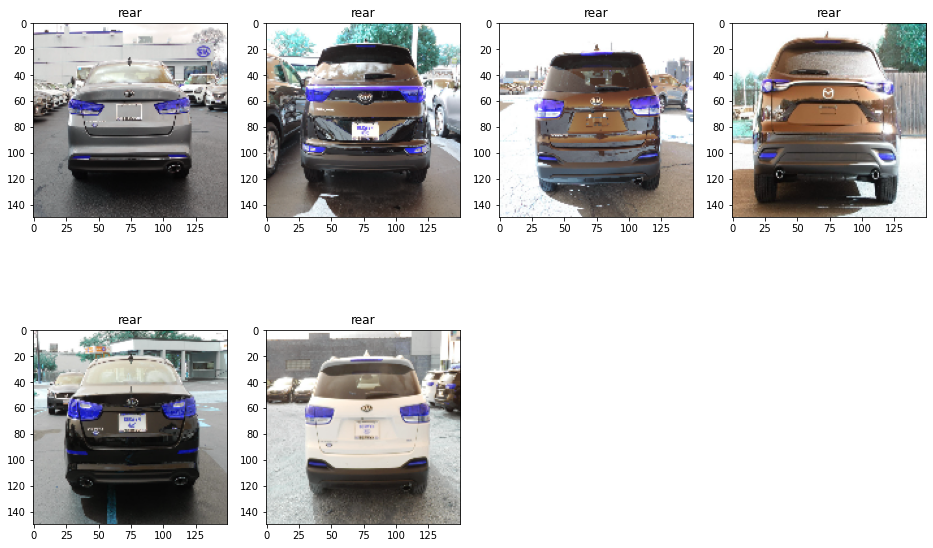

/kaggle/input/car-classification/Sr.DS Assgn/data/3_4th_driver_side_rear/39500.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/3_4th_driver_side_rear/8930.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/3_4th_driver_side_rear/64047.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/3_4th_driver_side_rear/94405.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/3_4th_driver_side_rear/138887.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/3_4th_driver_side_rear/45997.jpg


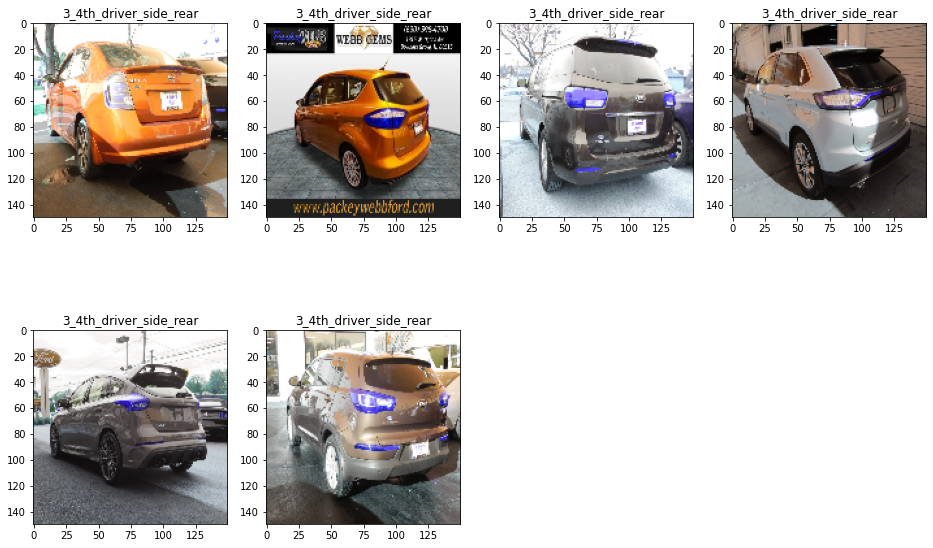

/kaggle/input/car-classification/Sr.DS Assgn/data/passenger_side/186497.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/passenger_side/188151.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/passenger_side/187667.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/passenger_side/196029.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/passenger_side/178800.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/passenger_side/176601.jpg


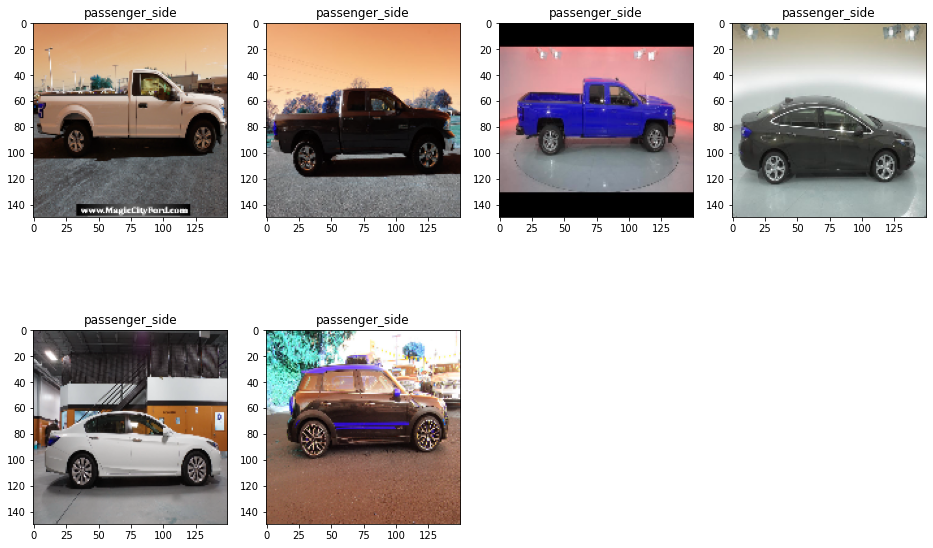

/kaggle/input/car-classification/Sr.DS Assgn/data/front/23274.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/front/85099.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/front/28106.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/front/129854.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/front/83166.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/front/4581.jpg


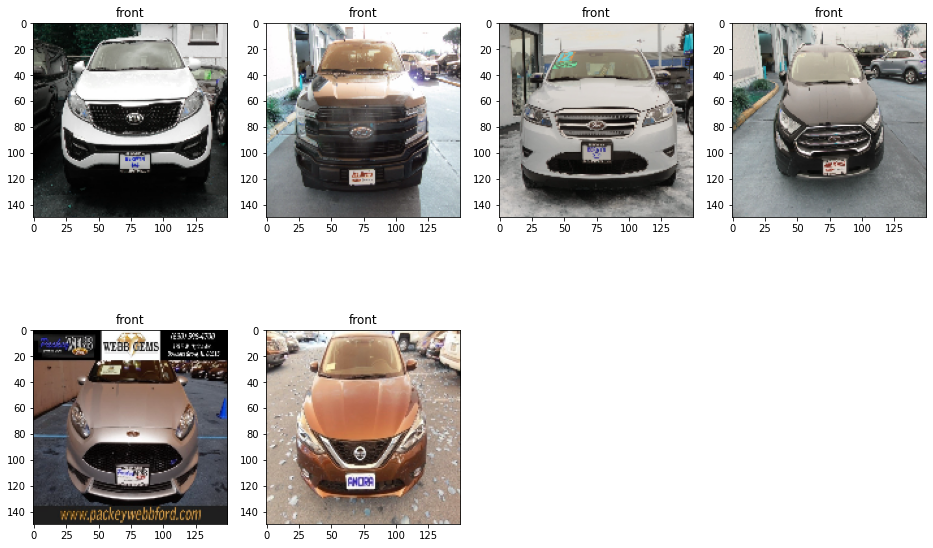

/kaggle/input/car-classification/Sr.DS Assgn/data/3_4th_passenger_side_front/72914.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/3_4th_passenger_side_front/77404.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/3_4th_passenger_side_front/25779.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/3_4th_passenger_side_front/11684.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/3_4th_passenger_side_front/68038.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/3_4th_passenger_side_front/39620.jpg


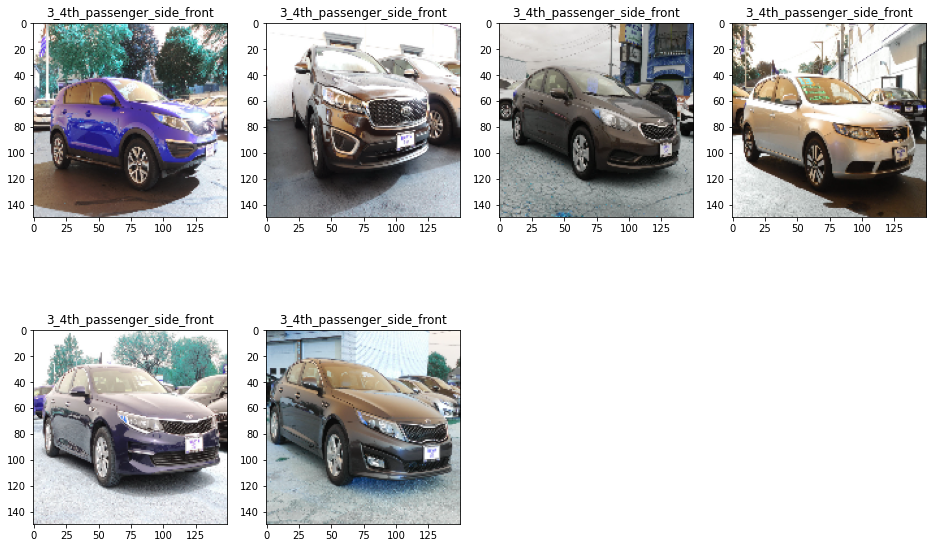

/kaggle/input/car-classification/Sr.DS Assgn/data/3_4th_passenger_side_rear/54415.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/3_4th_passenger_side_rear/99678.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/3_4th_passenger_side_rear/72297.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/3_4th_passenger_side_rear/49617.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/3_4th_passenger_side_rear/1626.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/3_4th_passenger_side_rear/94155.jpg


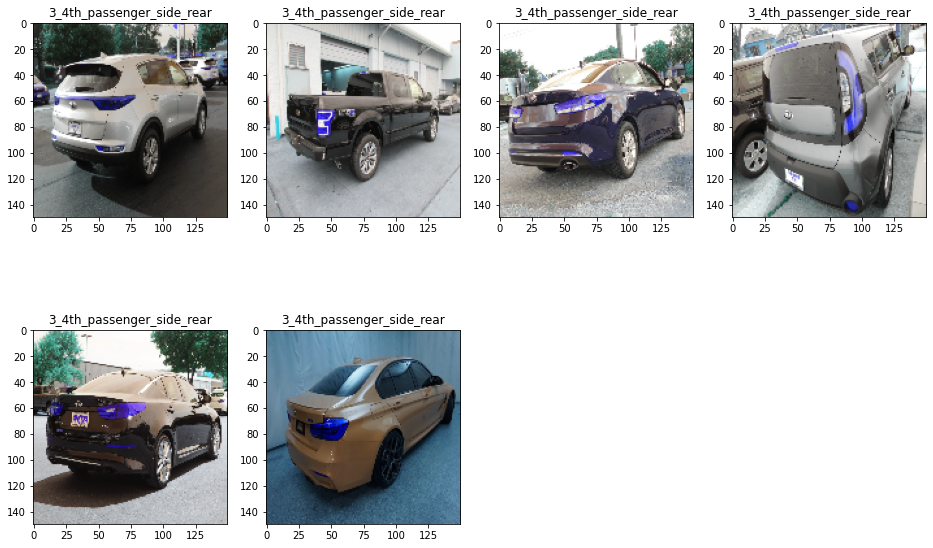

/kaggle/input/car-classification/Sr.DS Assgn/data/3_4th_driver_side_front/42710.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/3_4th_driver_side_front/42711.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/3_4th_driver_side_front/39221.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/3_4th_driver_side_front/50118.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/3_4th_driver_side_front/38780.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/3_4th_driver_side_front/38800.jpg


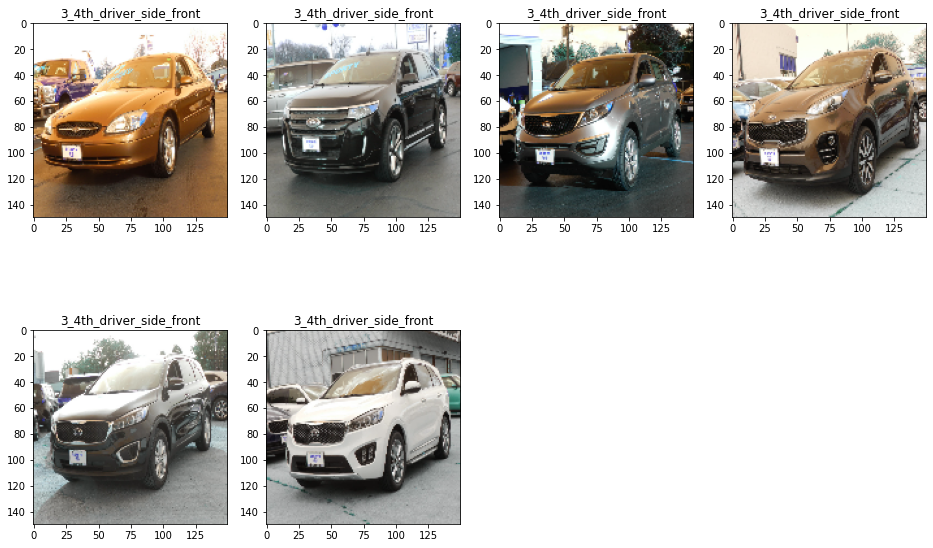

/kaggle/input/car-classification/Sr.DS Assgn/data/driver_side/163201.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/driver_side/30325.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/driver_side/111058.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/driver_side/186242.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/driver_side/64246.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/driver_side/77722.jpg


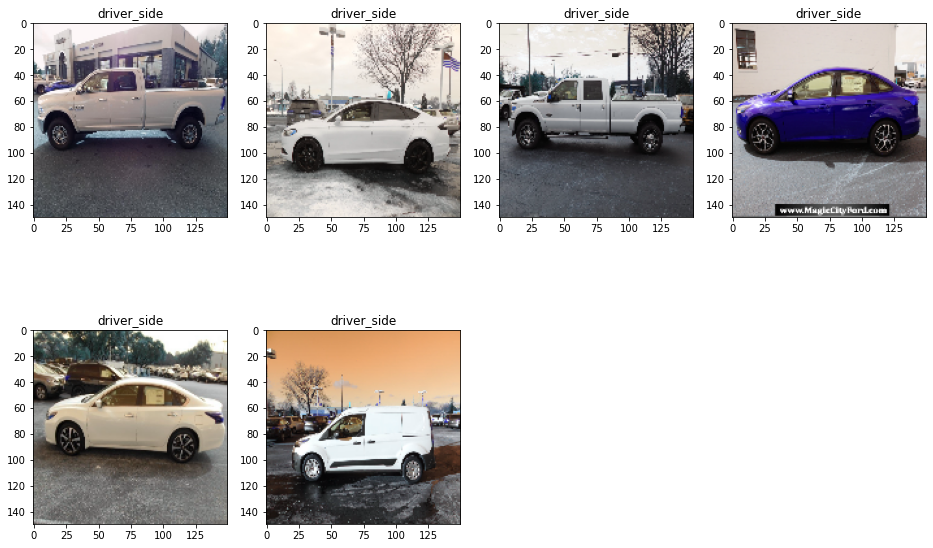

In [224]:
#please analyse the data and figure if data requires any pre-processing or augmentation.
#visualize sample images from every class
for class_name in unique_classes:
    i=1
    f=plt.figure(figsize=(16, 16))
    part_df= df[df['class']==class_name]
    for image in (part_df[:6])['img_path']:
        print(image)
        img=cv2.imread(image)
    #     print(img.shape)
        f.add_subplot(3, 4, i)
        plt.title(image.split('/')[-2])
        img=cv2.resize(img, (150,150))
        plt.imshow(img)    
        i=i+1
    plt.show()

## Splitting Data

In [227]:
df.head()

img_path    class
0  /kaggle/input/car-classification/Sr.DS Assgn/d...  unknown
1  /kaggle/input/car-classification/Sr.DS Assgn/d...  unknown
2  /kaggle/input/car-classification/Sr.DS Assgn/d...  unknown
3  /kaggle/input/car-classification/Sr.DS Assgn/d...  unknown
4  /kaggle/input/car-classification/Sr.DS Assgn/d...  unknown

In [228]:
## Split data 80% training, 10% Validation, 10% testing
train_size=0.8
X = df.drop(columns = ['class']).copy()
y = df['class']
# In the first step we will split the data in training and remaining dataset
traindf, df_rem= train_test_split(df, test_size=0.2, random_state=42)#, stratify=df['class'])
# X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8, stratify=y, random_state=42)
# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
# X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, stratify=y_rem, random_state=42)
testdf, valdf= train_test_split(df_rem, test_size=0.5, random_state=42)#, stratify=df_rem['class'])
print(traindf.shape)
print(testdf.shape)
print(valdf.shape)

#check class balance
print("****************** traindf ***********************")
print(traindf['class'].value_counts())
print("****************** testdf ***********************")
print(testdf['class'].value_counts())
print("****************** valdf ***********************")
print(valdf['class'].value_counts())

(3600, 2)
(450, 2)
(450, 2)
****************** traindf ***********************
3_4th_passenger_side_rear     414
passenger_side                408
rear                          406
front                         404
3_4th_driver_side_front       403
3_4th_passenger_side_front    393
3_4th_driver_side_rear        393
unknown                       390
driver_side                   389
Name: class, dtype: int64
****************** testdf ***********************
3_4th_driver_side_rear        60
3_4th_passenger_side_front    55
front                         52
driver_side                   52
passenger_side                52
unknown                       51
3_4th_driver_side_front       45
3_4th_passenger_side_rear     43
rear                          40
Name: class, dtype: int64
****************** valdf ***********************
driver_side                   59
unknown                       59
rear                          54
3_4th_driver_side_front       52
3_4th_passenger_side_front    52
3_

In [333]:
#define img_shape
height = 224
width = 224
channels = 3
batch_size = 32
img_shape = (height, width, channels)
img_size = (height, width)

In [242]:
# augmentation settings, for now just normalizing
#preprocessing_function=preprocess_input,
train_datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255.,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )
# not doing any data augmentation on validation test set
#preprocessing_function=preprocess_input,
valid_datagen  = ImageDataGenerator(rescale=1./255.)
# creating train and valid generators (not using valid_split to avoid doing data augmentation on validation set)




train_generator = train_datagen.flow_from_dataframe(
    traindf, 
    x_col='img_path',
    y_col='class',
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical'
)
valid_generator = valid_datagen.flow_from_dataframe(
    valdf, 
    x_col='img_path',
    y_col='class',
    target_size = img_size,
    batch_size = batch_size,
    class_mode='categorical'
)

Found 3600 validated image filenames belonging to 9 classes.
Found 450 validated image filenames belonging to 9 classes.


## Define Generator

## Define Model

In [263]:
# add Fully connected last layers( as many as you like to improve the performance), 
#try-out drop-out in Fully connected layers if you think it is necessary
pre_trained_model=InceptionV3(input_shape=img_shape, include_top=False, weights='imagenet', pooling='avg')

for layer in pre_trained_model.layers:
    layer.trainable=False

x = pre_trained_model.output
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
#Add a final softmax layer for classfication
x=Dense(9,activation='softmax')(x)
model= Model(inputs=pre_trained_model.input,outputs=x)
# model.summary()

## Compiling Model

In [264]:
model.compile(optimizer=Adam(learning_rate=0.0001,beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=5e-04), loss='categorical_crossentropy',metrics=['accuracy'])

In [265]:
#define callback function and model checkpoint
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch,logs={}):
        if(logs.get('accuracy')>0.85):
            print('\nReached 85% accuracy so cancelling training')
            self.model.stop_training=True
            
filepath = 'InceptionV3_my_best_model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

## Training

In [267]:
callbacks= myCallback()
EPOCHS=10
history = model.fit_generator(train_generator,
    validation_data=valid_generator,
    epochs=EPOCHS,
    verbose=2, callbacks=[callbacks, checkpoint])

Epoch 1/10
113/113 - 112s - loss: 1.2900 - accuracy: 0.5131 - val_loss: 0.9519 - val_accuracy: 0.6422

Epoch 00001: val_loss improved from inf to 0.95190, saving model to InceptionV3_my_best_model.epoch01-loss0.95.hdf5
Epoch 2/10
113/113 - 81s - loss: 0.8324 - accuracy: 0.6608 - val_loss: 0.6866 - val_accuracy: 0.6800

Epoch 00002: val_loss improved from 0.95190 to 0.68663, saving model to InceptionV3_my_best_model.epoch02-loss0.69.hdf5
Epoch 3/10
113/113 - 81s - loss: 0.7384 - accuracy: 0.6836 - val_loss: 0.6281 - val_accuracy: 0.7222

Epoch 00003: val_loss improved from 0.68663 to 0.62808, saving model to InceptionV3_my_best_model.epoch03-loss0.63.hdf5
Epoch 4/10
113/113 - 80s - loss: 0.6361 - accuracy: 0.7319 - val_loss: 0.6010 - val_accuracy: 0.7178

Epoch 00004: val_loss improved from 0.62808 to 0.60103, saving model to InceptionV3_my_best_model.epoch04-loss0.60.hdf5
Epoch 5/10
113/113 - 80s - loss: 0.6313 - accuracy: 0.7322 - val_loss: 0.5585 - val_accuracy: 0.7400

Epoch 00005: 

In [334]:
#As per logs can see at 5th epoch we have improvement of val_loss. 
# i have trained unitl 10 epochs but 5th epochs is good so using 5th epoch


# Epoch 5/10
# 113/113 - 80s - loss: 0.6313 - accuracy: 0.7322 - val_loss: 0.5585 - val_accuracy: 0.7400
# Epoch 00005: val_loss improved from 0.60103 to 0.55848, saving model to InceptionV3_my_best_model.epoch05-loss0.56.hdf5

## visualize Accuracy & Loss

<Figure size 432x288 with 0 Axes>

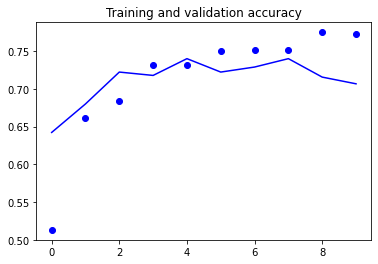

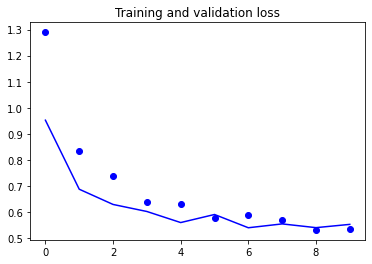

<Figure size 432x288 with 0 Axes>

In [269]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs= range(len(acc))
plt.plot(epochs, acc,'bo',label='Training accuracy')
plt.plot(epochs, val_acc,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss,'bo',label='Training loss')
plt.plot(epochs, val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.figure()

### Load Model checkpoint

In [271]:
##add Code Here to preprocess image before testing
# Pick the best model weights for testing and test it on few images
model_h5 = tf.keras.models.load_model('././InceptionV3_my_best_model.epoch05-loss0.56.hdf5')

## Testing

In [330]:
def predict_image(filename, model):
    print(filename)
    img_ = image.load_img(filename, target_size=(224, 224))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.
    # print(img_processed)
    prediction = model.predict(img_processed)
    print(prediction)
    index = np.argmax(prediction)
    print(index)
    for key, value in train_generator.class_indices.items():
        if value== index:
            print(key)
    plt.imshow(img_array)
    plt.show()

220 /kaggle/input/car-classification/Sr.DS Assgn/data/unknown/81434.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/unknown/81434.jpg
[[3.8361668e-06 1.3148792e-05 3.8027665e-07 7.2098985e-08 1.1588097e-07
  6.0451794e-07 8.3350915e-06 4.3293610e-05 9.9993026e-01]]
8
unknown


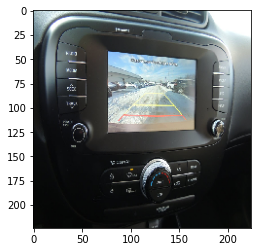

3944 /kaggle/input/car-classification/Sr.DS Assgn/data/3_4th_driver_side_front/36114.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/3_4th_driver_side_front/36114.jpg
[[7.0103663e-01 9.3407341e-04 2.9708427e-01 4.2720421e-04 3.1387957e-05
  8.0328260e-05 3.7569473e-05 1.5610081e-05 3.5287719e-04]]
0
3_4th_driver_side_front


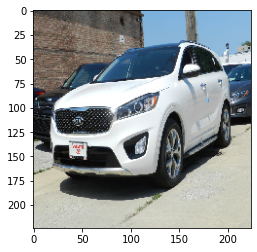

1461 /kaggle/input/car-classification/Sr.DS Assgn/data/3_4th_driver_side_rear/26571.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/3_4th_driver_side_rear/26571.jpg
[[1.8366681e-03 8.8536727e-01 8.4150431e-04 1.0566152e-01 8.0733465e-05
  5.0131395e-04 1.8676347e-04 5.3427382e-03 1.8155400e-04]]
1
3_4th_driver_side_rear


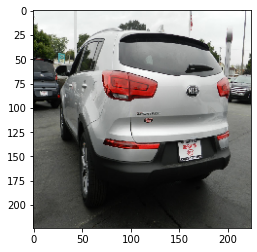

2287 /kaggle/input/car-classification/Sr.DS Assgn/data/front/25615.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/front/25615.jpg
[[2.2071411e-06 1.6291060e-09 6.3215271e-07 1.1072417e-08 4.5727244e-09
  9.9999118e-01 1.6012027e-08 3.4548038e-06 2.5568077e-06]]
5
front


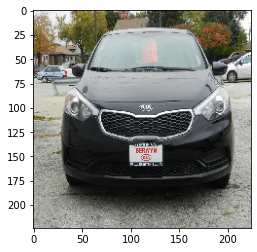

4462 /kaggle/input/car-classification/Sr.DS Assgn/data/driver_side/184769.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/driver_side/184769.jpg
[[1.6799536e-04 8.5143908e-04 1.3509109e-03 2.7807234e-03 4.9600175e-01
  1.6034075e-05 4.8644859e-01 8.1592752e-03 4.2233062e-03]]
4
driver_side


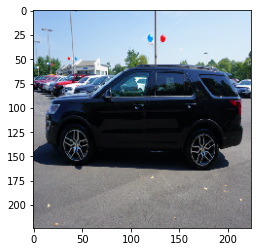

4163 /kaggle/input/car-classification/Sr.DS Assgn/data/driver_side/181461.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/driver_side/181461.jpg
[[1.2546700e-03 3.8445662e-04 1.8813376e-03 2.0139571e-04 3.2215881e-01
  1.8127967e-05 6.7406458e-01 2.1076752e-05 1.5552365e-05]]
6
passenger_side


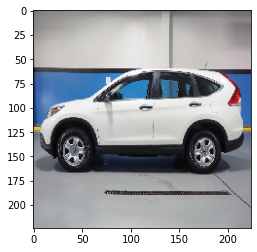

3951 /kaggle/input/car-classification/Sr.DS Assgn/data/3_4th_driver_side_front/55541.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/3_4th_driver_side_front/55541.jpg
[[4.0201303e-01 2.8420088e-04 5.7630873e-01 7.0568273e-04 7.4998701e-05
  1.9605849e-02 1.3435329e-04 4.9468706e-04 3.7841900e-04]]
2
3_4th_passenger_side_front


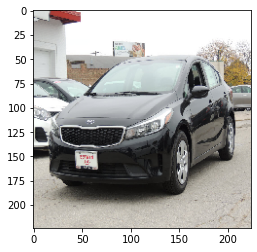

2594 /kaggle/input/car-classification/Sr.DS Assgn/data/3_4th_passenger_side_front/25707.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/3_4th_passenger_side_front/25707.jpg
[[3.0251423e-01 3.7010806e-03 6.9074702e-01 2.0165814e-03 3.4364383e-04
  3.0622375e-04 7.4815012e-05 6.4188323e-05 2.3231370e-04]]
2
3_4th_passenger_side_front


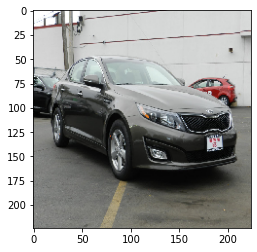

2392 /kaggle/input/car-classification/Sr.DS Assgn/data/front/107045.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/front/107045.jpg
[[1.9902055e-04 6.9962693e-06 3.6116842e-05 8.1662783e-06 2.4924597e-07
  9.9896848e-01 5.1451402e-06 7.7127258e-04 4.4665358e-06]]
5
front


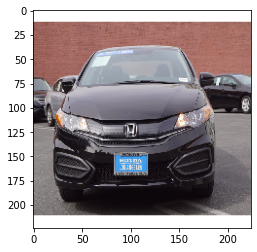

2323 /kaggle/input/car-classification/Sr.DS Assgn/data/front/99296.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/front/99296.jpg
[[1.01312115e-04 1.44348684e-04 1.58041643e-04 7.64458091e-05
  6.15935586e-03 5.16817451e-01 6.34900481e-03 4.69123751e-01
  1.07031572e-03]]
5
front


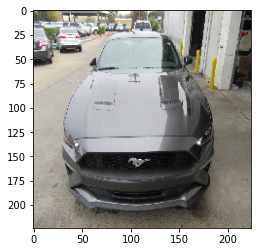

1773 /kaggle/input/car-classification/Sr.DS Assgn/data/passenger_side/184113.jpg
/kaggle/input/car-classification/Sr.DS Assgn/data/passenger_side/184113.jpg
[[1.72620144e-04 8.18746688e-04 1.17261370e-04 3.28373560e-03
  6.43657982e-01 1.66052138e-04 3.51427883e-01 1.15866605e-04
  2.39833447e-04]]
4
driver_side


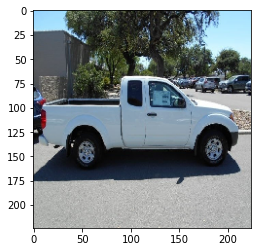

In [331]:
j=0
# for img in testdf['img_path']:
for index, row in testdf.iterrows():
    print(index, row['img_path'])
    predict_image(row['img_path'], model_h5)
    j=j+1
    if j>10:
        break
# predict_image(testdf['img_path'].iloc[0], model_h5)

## Improving Model

In [332]:
#Please add your thoughts on way to improve the model.
#Can see some wrong predictions by trained model, 
#As our model accuracy is good but we have loss too(loss: 0.6313 - accuracy: 0.7322 - val_loss: 0.5585 - val_accuracy: 0.7400)
# we can decrease val_loss by hyper tuning the parameters of the model or can try different optimizers as well